# Notes

This notebook attempts to plot the baryonic mass fraction of halos, filaments and voids in the IllustrisTNG simulation in the style of Figure 2 from Martizzi+19 (https://arxiv.org/abs/1810.01883) and Figure A.1 from Artale+21 (https://arxiv.org/abs/2102.01092)

Code is adapted from Plot_evolving_density_structures.ipynb

# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import yt
import trident
from trident import LightRay
import illustris_python as il
from astropy import units as u
from astropy import constants as c
from yt.utilities.cosmology import Cosmology
from matplotlib import pyplot as plt


/draco/u/cwalker/virtual_environments/yt-git/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /u/cwalker/.config/yt/ytrc is deprecated in favor of /u/cwalker/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0 . This feature will be removed in v4.1.0
  from yt.config import ytcfg


# Choose snapshots to plot for

In [2]:
snapshots = [99,91,84,78,72,67,59,50,40,33,25,21,17]#,13,11,8,6,4,3,2]


# Begin

In [ ]:
###################
#initialise arrays#
###################

#redshift array
redshifts=[]

#baryon arrays
#PartType0 (gas)
tot_PT0_arr = []
hal_PT0_arr = []
fil_PT0_arr = []
voi_PT0_arr = []
#PartType4 (stars)
tot_PT4_arr = []
hal_PT4_arr = []
fil_PT4_arr = []
voi_PT4_arr = []

#check arrays
dens_crit_array = []
m_p_array = []

#####################
#loop over snapshots#
#####################

for i in range(len(snapshots)):
    
    #################
    #select snapshot#
    #################
    
    snapshot = snapshots[i]
    print('processsing snapshot {0:02d}'.format(snapshot))
    
    ######################
    #load snapshot header#
    ######################
    
    print('loading snapshot header')
    basepath = '/virgo/simulations/IllustrisTNG/TNG100-3/output/'
    header=il.groupcat.loadHeader(basepath,snapshot)
    print('header loaded.')
    
    ########################################################
    #extract redshift from header, append to redshift array#
    ########################################################
    
    redshifts.append(header['Redshift'])
    
    #####################
    #load Illustris data#
    #####################
    
    data='/virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_0{0:02d}/snap_0{0:02d}.0.hdf5'.format(snapshot)
    print('loading dataset: {0}'.format(data))
    ds=yt.load(data)
    print('data loaded.')

    ####################################
    #define proton mass in solar masses#
    ####################################
    
    print('calculating proton mass:')
    m_p = ds.quan((c.m_p).to(u.solMass).value,'Msun')
    print ('proton mass: {0}'.format(m_p))
    m_p_array.append(m_p)
    
    ds.index
    
    ############################################
    #calculate critical density of the Universe#
    ############################################
    
    print('Calculating critical density of the Universe')
    co=Cosmology()
    grav=ds.quan(6.6743e-11,'m**3/(kg*s**2)')
    H=co.hubble_parameter(0).in_units('km/s/Mpc')
    print('grav={0}'.format(grav))
    print('H0 = {0}'.format(H))
    dens_crit = ((3 * H**2)/(8*np.pi* grav))#.in_units('h**2/(code_length**3/(Msun*s**2))')
    print ('critical density is: {0}'.format(dens_crit))
    print('critical density in kg/m^3: {0}'.format(dens_crit.in_units('kg/m**3')))
    dens_crit_array.append(dens_crit)
    
    ad = ds.all_data()
    
    ##########################################################
    #convert dark matter density to units of critical density#
    ##########################################################
    
    #PartType0 (gas)
    dark_units_PT0 = ad['PartType0','SubfindDMDensity']*ds.quan(1e10,"(Msun/h)/((code_length)**3)")/dens_crit
    #PartType4 (stars)
    dark_units_PT4 = ad['PartType4','SubfindDMDensity']*ds.quan(1e10,"(Msun/h)/((code_length)**3)")/dens_crit
    
    ###############################################################
    #create Large-Scale Structure (LSS) masks for each matter type#
    ###############################################################
    
    #PartType0 (gas)
    voi_mask_PT0 = dark_units_PT0 < 0.1
    fil_mask_PT0 = ((dark_units_PT0 >= 0.1) & (dark_units_PT0<57))
    hal_mask_PT0 = dark_units_PT0 >= 0.57
    #PartType4 (stars)
    voi_mask_PT4 = dark_units_PT4 < 0.1
    fil_mask_PT4 = ((dark_units_PT4 >= 0.1) & (dark_units_PT4<57))
    hal_mask_PT4 = dark_units_PT4 >= 0.57

    ##########################################################
    #calculate mass in each LSS for each baryonic matter type#
    ##########################################################
    
    #PartType0 (gas)
    tot_PT0 = np.sum(ad['PartType0','Masses'])
    hal_PT0 = np.sum(ad['PartType0','Masses'][hal_mask_PT0])
    fil_PT0 = np.sum(ad['PartType0','Masses'][fil_mask_PT0])
    voi_PT0 = np.sum(ad['PartType0','Masses'][voi_mask_PT0])
    #PartType4 (stars)
    tot_PT4 = np.sum(ad['PartType4','Masses'])
    hal_PT4 = np.sum(ad['PartType4','Masses'][hal_mask_PT4])
    fil_PT4 = np.sum(ad['PartType4','Masses'][fil_mask_PT4])
    voi_PT4 = np.sum(ad['PartType4','Masses'][voi_mask_PT4])
    
    ##########################
    #append results to arrays#
    ##########################
    
    #PartType0 (gas)
    tot_PT0_arr.append(tot_PT0)
    hal_PT0_arr.append(hal_PT0)
    fil_PT0_arr.append(fil_PT0) 
    voi_PT0_arr.append(voi_PT0) 
    #PartType4 (gas)
    tot_PT4_arr.append(tot_PT4)
    hal_PT4_arr.append(hal_PT4)
    fil_PT4_arr.append(fil_PT4) 
    voi_PT4_arr.append(voi_PT4) 
    
    print('filled baryon arrays')
    
    
    
    

processsing snapshot 99
loading snapshot header
header loaded.
loading dataset: /virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_099/snap_099.0.hdf5


yt : [INFO     ] 2021-05-17 15:26:45,891 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2021-05-17 15:26:45,956 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2021-05-17 15:26:45,957 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-17 15:26:45,957 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-17 15:26:45,958 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-05-17 15:26:45,959 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-17 15:26:45,959 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2021-05-17 15:26:45,960 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-05-17 15:26:45,960 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-05-17 15:26:45,961 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-17 15:26:45,961 Parameters: hubble_consta

data loaded.
calculating proton mass:
proton mass: 8.411856872862986e-58 Msun


yt : [INFO     ] 2021-05-17 15:26:49,309 Allocating for 3.738e+08 particles
Initializing refined index: 100%|█████████▉| 721/722 [25:08<00:02,  2.09s/it]


Calculating critical density of the Universe
grav=6.6743e-11 m**3/(kg*s**2)
H0 = 71.0 km/(Mpc*s)
critical density is: 9.468720094206941e-27 kg/m**3
critical density in kg/m^3: 9.468720094206941e-27 kg/m**3
filled baryon arrays
processsing snapshot 91
loading snapshot header
header loaded.
loading dataset: /virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_091/snap_091.0.hdf5


yt : [INFO     ] 2021-05-17 15:56:10,718 Calculating time from 9.096e-01 to be 3.934e+17 seconds
yt : [INFO     ] 2021-05-17 15:56:10,802 Parameters: current_time              = 3.934088884834162e+17 s
yt : [INFO     ] 2021-05-17 15:56:10,803 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-17 15:56:10,803 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-17 15:56:10,804 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-05-17 15:56:10,805 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-17 15:56:10,805 Parameters: current_redshift          = 0.09940180263022191
yt : [INFO     ] 2021-05-17 15:56:10,806 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-05-17 15:56:10,806 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-05-17 15:56:10,807 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-17 15:56:10,807 Parameters: hubble_constant

data loaded.
calculating proton mass:
proton mass: 8.411856872862986e-58 Msun


yt : [INFO     ] 2021-05-17 15:56:15,923 Allocating for 3.739e+08 particles
Initializing refined index: 100%|█████████▉| 722/723 [23:03<00:01,  1.92s/it]


Calculating critical density of the Universe
grav=6.6743e-11 m**3/(kg*s**2)
H0 = 71.0 km/(Mpc*s)
critical density is: 9.468720094206941e-27 kg/m**3
critical density in kg/m^3: 9.468720094206941e-27 kg/m**3
filled baryon arrays
processsing snapshot 84
loading snapshot header
header loaded.
loading dataset: /virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_084/snap_084.0.hdf5


yt : [INFO     ] 2021-05-17 16:23:27,914 Calculating time from 8.352e-01 to be 3.573e+17 seconds
yt : [INFO     ] 2021-05-17 16:23:27,992 Parameters: current_time              = 3.5730710036197434e+17 s
yt : [INFO     ] 2021-05-17 16:23:27,992 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-17 16:23:27,993 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-17 16:23:27,994 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-05-17 16:23:27,994 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-17 16:23:27,995 Parameters: current_redshift          = 0.19728418237600986
yt : [INFO     ] 2021-05-17 16:23:27,995 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-05-17 16:23:27,996 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-05-17 16:23:27,996 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-17 16:23:27,997 Parameters: hubble_constan

data loaded.
calculating proton mass:
proton mass: 8.411856872862986e-58 Msun


yt : [INFO     ] 2021-05-17 16:23:33,712 Allocating for 3.740e+08 particles
Initializing refined index: 100%|█████████▉| 721/722 [21:58<00:01,  1.83s/it]


Calculating critical density of the Universe
grav=6.6743e-11 m**3/(kg*s**2)
H0 = 71.0 km/(Mpc*s)
critical density is: 9.468720094206941e-27 kg/m**3
critical density in kg/m^3: 9.468720094206941e-27 kg/m**3
filled baryon arrays
processsing snapshot 78
loading snapshot header
header loaded.
loading dataset: /virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_078/snap_078.0.hdf5


yt : [INFO     ] 2021-05-17 16:49:34,566 Calculating time from 7.706e-01 to be 3.250e+17 seconds
yt : [INFO     ] 2021-05-17 16:49:34,643 Parameters: current_time              = 3.249985189528167e+17 s
yt : [INFO     ] 2021-05-17 16:49:34,644 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-17 16:49:34,644 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-17 16:49:34,645 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-05-17 16:49:34,646 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-17 16:49:34,646 Parameters: current_redshift          = 0.2977176845174465
yt : [INFO     ] 2021-05-17 16:49:34,647 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-05-17 16:49:34,647 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-05-17 16:49:34,648 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-17 16:49:34,648 Parameters: hubble_constant 

data loaded.
calculating proton mass:
proton mass: 8.411856872862986e-58 Msun


yt : [INFO     ] 2021-05-17 16:49:39,550 Allocating for 3.741e+08 particles
Initializing refined index: 100%|█████████▉| 721/722 [22:07<00:01,  1.84s/it]  


Calculating critical density of the Universe
grav=6.6743e-11 m**3/(kg*s**2)
H0 = 71.0 km/(Mpc*s)
critical density is: 9.468720094206941e-27 kg/m**3
critical density in kg/m^3: 9.468720094206941e-27 kg/m**3
filled baryon arrays
processsing snapshot 72
loading snapshot header
header loaded.
loading dataset: /virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_072/snap_072.0.hdf5


yt : [INFO     ] 2021-05-17 17:15:47,978 Calculating time from 7.143e-01 to be 2.963e+17 seconds
yt : [INFO     ] 2021-05-17 17:15:48,056 Parameters: current_time              = 2.962980875926263e+17 s
yt : [INFO     ] 2021-05-17 17:15:48,056 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-17 17:15:48,057 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-17 17:15:48,057 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-05-17 17:15:48,058 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-17 17:15:48,058 Parameters: current_redshift          = 0.3999269646135635
yt : [INFO     ] 2021-05-17 17:15:48,059 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-05-17 17:15:48,059 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-05-17 17:15:48,060 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-17 17:15:48,060 Parameters: hubble_constant 

data loaded.
calculating proton mass:
proton mass: 8.411856872862986e-58 Msun


yt : [INFO     ] 2021-05-17 17:15:53,462 Allocating for 3.742e+08 particles
Initializing refined index: 100%|█████████▉| 720/721 [21:27<00:01,  1.79s/it]  


Calculating critical density of the Universe
grav=6.6743e-11 m**3/(kg*s**2)
H0 = 71.0 km/(Mpc*s)
critical density is: 9.468720094206941e-27 kg/m**3
critical density in kg/m^3: 9.468720094206941e-27 kg/m**3
filled baryon arrays
processsing snapshot 67
loading snapshot header
header loaded.
loading dataset: /virgo/simulations/IllustrisTNG/TNG100-3/output/snapdir_067/snap_067.0.hdf5


yt : [INFO     ] 2021-05-17 17:41:22,035 Calculating time from 6.653e-01 to be 2.710e+17 seconds
yt : [INFO     ] 2021-05-17 17:41:22,111 Parameters: current_time              = 2.7097180874458618e+17 s
yt : [INFO     ] 2021-05-17 17:41:22,112 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-17 17:41:22,113 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-17 17:41:22,113 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2021-05-17 17:41:22,114 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-17 17:41:22,115 Parameters: current_redshift          = 0.5030475232448832
yt : [INFO     ] 2021-05-17 17:41:22,115 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2021-05-17 17:41:22,115 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2021-05-17 17:41:22,116 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-17 17:41:22,116 Parameters: hubble_constant

data loaded.
calculating proton mass:
proton mass: 8.411856872862986e-58 Msun


yt : [INFO     ] 2021-05-17 17:41:27,489 Allocating for 3.743e+08 particles
Initializing refined index:   5%|▌         | 37/723 [01:18<24:09,  2.11s/it]

In [26]:
#########################
#convert to numpy arrays#
#########################

tot_PT0_arr=np.array(tot_PT0_arr)
hal_PT0_arr=np.array(hal_PT0_arr)
fil_PT0_arr=np.array(fil_PT0_arr)
voi_PT0_arr=np.array(voi_PT0_arr)

tot_PT4_arr=np.array(tot_PT4_arr)
hal_PT4_arr=np.array(hal_PT4_arr)
fil_PT4_arr=np.array(fil_PT4_arr)
voi_PT4_arr=np.array(voi_PT4_arr)

In [27]:
###############
#check lengths#
###############

print(len(snapshots))
print(len(redshifts))
print(len(m_p_array))
print(len(dens_crit_array))
print(len(hal_PT0_arr))
print(len(fil_PT0_arr))
print(len(voi_PT0_arr))
print(len(hal_PT4_arr))
print(len(fil_PT4_arr))
print(len(voi_PT4_arr))

13
13
13
13
13
13
13
13
13
13


In [28]:
#######################
#create mass fractions#
#######################

hal_frac = (hal_PT0_arr + hal_PT4_arr)/(hal_PT0_arr + hal_PT4_arr + fil_PT0_arr + fil_PT4_arr + voi_PT0_arr + voi_PT4_arr)
fil_frac = (fil_PT0_arr + fil_PT4_arr)/(hal_PT0_arr + hal_PT4_arr + fil_PT0_arr + fil_PT4_arr + voi_PT0_arr + voi_PT4_arr)
voi_frac = (voi_PT0_arr + voi_PT4_arr)/(hal_PT0_arr + hal_PT4_arr + fil_PT0_arr + fil_PT4_arr + voi_PT0_arr + voi_PT4_arr)


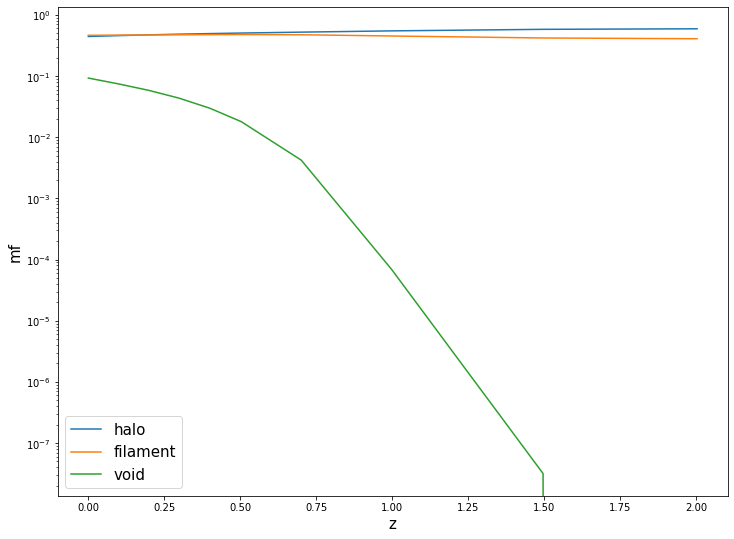

In [30]:
#####################
#plot mass fractions#
#####################

fig=plt.figure(figsize=(12,9))

ax1=fig.add_subplot(111)
ax1.set_xlabel('z',fontsize=15)
ax1.set_ylabel('mf',fontsize=15)
ax1.set_yscale('log')

ax1.plot(redshifts[0:10],hal_frac[0:10],label='halo')
ax1.plot(redshifts[0:10],fil_frac[0:10],label='filament')
ax1.plot(redshifts[0:10],voi_frac[0:10],label='void')


plt.legend(fontsize=15)
plt.savefig('evolving_mass_fraction.png')
plt.show()